In [204]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier



from scipy import stats
from prettytable import PrettyTable




# Our Scientific Questioning

Thanks to the information received by the website https://bigcitieshealthdata.org, we aim to predict the type of death thanks to data such as the place of living, gender or details about the environment of a person. 

# 1. Data Gathering

In [205]:
data = pd.read_csv('BigCitiesHealth.csv')

In [206]:
data

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male,Asian/PI Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://

Get data information such as data types, shape etc.

In [207]:
data.shape

(148292, 31)

In [208]:
data.dtypes

metric_item_label                   object
metric_cat_label                    object
metric_subcat_label                 object
metric_item_label_subtitle          object
metric_cat_item_yaxis_label         object
metric_source_desc_label_fn         object
metric_source_desc_label_url_fn     object
geo_label_city                      object
geo_label_state                     object
geo_label_citystate                 object
geo_fips_code                      float64
value                              float64
date_label                           int64
geo_label_proxy_or_real             object
geo_label_proxy_footnote            object
geo_fips_desc                       object
date_label_proxy_or_real            object
date_label_proxy_footnote           object
value_ci_flag_yesno                 object
value_95_ci_low                    float64
value_95_ci_high                   float64
value_90_ci_low                    float64
value_90_ci_high                   float64
geo_strata_

# 2. Data PreProcessing

We can see the different types of deaths possible from our data

In [209]:
death_rows = data[data['metric_subcat_label'].str.contains('death', case=False)]
death_rows['metric_item_label'].value_counts()

Premature Death                        5775
Deaths from All Causes                 5371
Injury Deaths                          5173
Motor Vehicle Deaths                   4313
Firearm Deaths                         4092
Police Killings                        1496
Infant Deaths                          1152
Maternal Deaths                         770
Racial Disparity in Police Killings     374
Name: metric_item_label, dtype: int64

So we will only keep the rows that interest us which are the rows where there is 'death' in the metric_subcat_label column

In [210]:
data_death_only = data[data['metric_subcat_label'].str.contains('death', case=False)]
data_death_only

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
5106,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Seattle,WA,"Seattle, WA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both,NaN
5107,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Male,NaN
5108,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oklahoma City,OK,"Oklahoma City, OK",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both,NaN
5109,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
5110,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Columbus,OH,"Columbus, OH",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Black,Male,Black Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwa

In this step, the goal is to drop non-relevant columns or rows, in order to get a clean and non-missing item data.

In [211]:
plot_missing = data_death_only.isnull().sum()
plot_missing

metric_item_label                      0
metric_cat_label                       0
metric_subcat_label                    0
metric_item_label_subtitle             0
metric_cat_item_yaxis_label            0
metric_source_desc_label_fn            0
metric_source_desc_label_url_fn        0
geo_label_city                         0
geo_label_state                       62
geo_label_citystate                    0
geo_fips_code                         62
value                                308
date_label                             0
geo_label_proxy_or_real                0
geo_label_proxy_footnote           27030
geo_fips_desc                          0
date_label_proxy_or_real               0
date_label_proxy_footnote          28006
value_ci_flag_yesno                    0
value_95_ci_low                     1942
value_95_ci_high                    1932
value_90_ci_low                    28516
value_90_ci_high                   28516
geo_strata_region                     62
geo_strata_pover

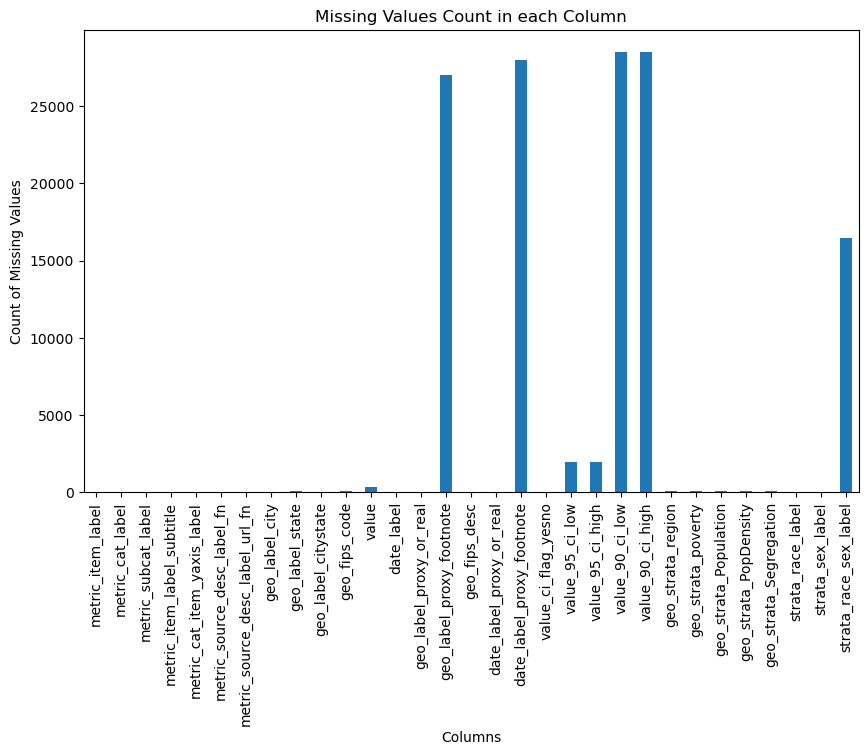

In [212]:
plt.figure(figsize=(10, 6))
plot_missing.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Count in each Column')
plt.show()

Dropping data from rows with a too high amount of missing values (more than 50% of data length)

In [213]:
threshold = len(data_death_only) * 0.5
data_death_only = data_death_only.dropna(thresh=threshold, axis=1)

In [214]:
len(data_death_only)

28516

In [215]:
data_death_only.isnull().sum()

metric_item_label                     0
metric_cat_label                      0
metric_subcat_label                   0
metric_item_label_subtitle            0
metric_cat_item_yaxis_label           0
metric_source_desc_label_fn           0
metric_source_desc_label_url_fn       0
geo_label_city                        0
geo_label_state                      62
geo_label_citystate                   0
geo_fips_code                        62
value                               308
date_label                            0
geo_label_proxy_or_real               0
geo_fips_desc                         0
date_label_proxy_or_real              0
value_ci_flag_yesno                   0
value_95_ci_low                    1942
value_95_ci_high                   1932
geo_strata_region                    62
geo_strata_poverty                   62
geo_strata_Population                62
geo_strata_PopDensity                62
geo_strata_Segregation               62
strata_race_label                     0


There seem to be several columns with the same missing rows, so it makes sense to suppress them

In [216]:
data_death_only = data_death_only.dropna(subset=['geo_label_state'])
data_death_only.isnull().sum()

metric_item_label                     0
metric_cat_label                      0
metric_subcat_label                   0
metric_item_label_subtitle            0
metric_cat_item_yaxis_label           0
metric_source_desc_label_fn           0
metric_source_desc_label_url_fn       0
geo_label_city                        0
geo_label_state                       0
geo_label_citystate                   0
geo_fips_code                         0
value                               308
date_label                            0
geo_label_proxy_or_real               0
geo_fips_desc                         0
date_label_proxy_or_real              0
value_ci_flag_yesno                   0
value_95_ci_low                    1880
value_95_ci_high                   1870
geo_strata_region                     0
geo_strata_poverty                    0
geo_strata_Population                 0
geo_strata_PopDensity                 0
geo_strata_Segregation                0
strata_race_label                     0


Also thosw with missing ci_95 high/low values

In [217]:
data_death_only = data_death_only.dropna(subset=['value_95_ci_low'])
data_death_only.isnull().sum()

metric_item_label                  0
metric_cat_label                   0
metric_subcat_label                0
metric_item_label_subtitle         0
metric_cat_item_yaxis_label        0
metric_source_desc_label_fn        0
metric_source_desc_label_url_fn    0
geo_label_city                     0
geo_label_state                    0
geo_label_citystate                0
geo_fips_code                      0
value                              0
date_label                         0
geo_label_proxy_or_real            0
geo_fips_desc                      0
date_label_proxy_or_real           0
value_ci_flag_yesno                0
value_95_ci_low                    0
value_95_ci_high                   0
geo_strata_region                  0
geo_strata_poverty                 0
geo_strata_Population              0
geo_strata_PopDensity              0
geo_strata_Segregation             0
strata_race_label                  0
strata_sex_label                   0
dtype: int64

No more missing values! Now lets look at our data. Are there still columns that we don't need? 

In [218]:
data_death_only

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
5106,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Seattle,WA,"Seattle, WA",...,yes,461.008945,513.234238,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5107,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,yes,954.331095,1002.484873,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Male
5108,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oklahoma City,OK,"Oklahoma City, OK",...,yes,320.748770,439.341284,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5109,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",...,yes,579.671889,655.777365,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
5110,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Columbus,OH,"Columbus, OH",...,yes,992.238894,1106.836430,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Black,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,yes,5668.487295,5903.948459,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,yes,6458.346917,7717.512570,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,yes,3723.288703,4475.407910,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 populat

In [219]:
data_death_only = data_death_only.drop(['metric_source_desc_label_fn', 'metric_source_desc_label_url_fn', 'geo_label_citystate'], axis=1)

Our data seems clear now! 

In [220]:
data_death_only

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,...,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
5106,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Seattle,WA,5363000.0,486.350121,2012,...,yes,461.008945,513.234238,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5107,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Fort Worth,TX,4827000.0,978.155993,2011,...,yes,954.331095,1002.484873,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Male
5108,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Oklahoma City,OK,4055000.0,376.240836,2012,...,yes,320.748770,439.341284,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5109,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Long Beach,CA,643000.0,616.697165,2012,...,yes,579.671889,655.777365,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
5110,Deaths from All Causes,Life Expectancy and Deaths,Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Columbus,OH,3918000.0,1048.217766,2010,...,yes,992.238894,1106.836430,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Black,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",New York City,NY,3651000.0,5786.217877,2020,...,yes,5668.487295,5903.948459,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553000.0,7087.929743,2020,...,yes,6458.346917,7717.512570,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Houston,TX,4835000.0,4099.348306,2011,...,yes,3723.288703,4475.407910,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553000.0,5706.528569,2014,...,yes,4594.357077,6818.700061,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both


In [221]:
data = data_death_only 

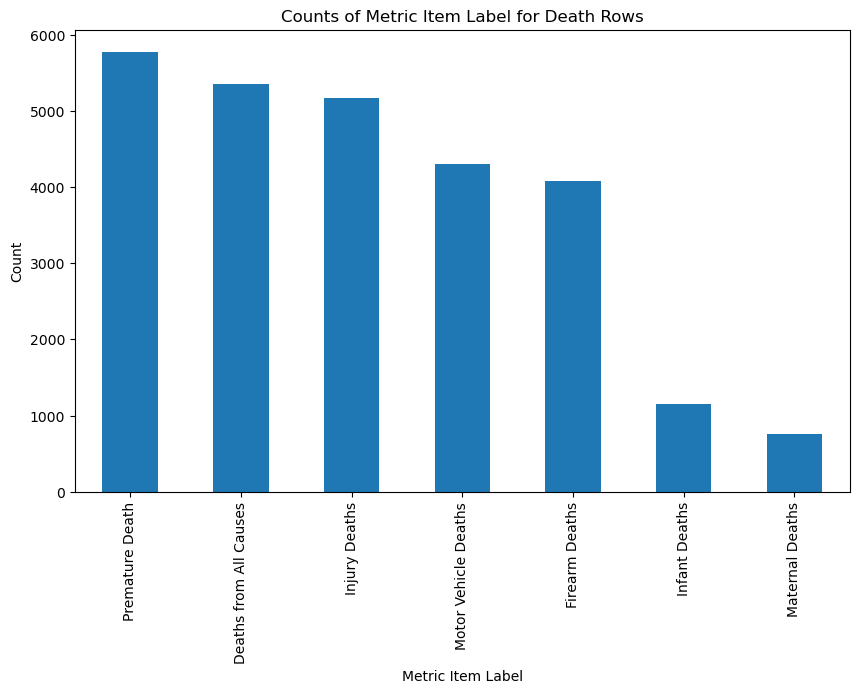

In [222]:
plot_dead = data['metric_item_label'].value_counts()
plt.figure(figsize=(10, 6))
plot_dead.plot(kind='bar')
plt.xlabel('Metric Item Label')
plt.ylabel('Count')
plt.title('Counts of Metric Item Label for Death Rows')
plt.show()

# 3. Exploratory Data Analysis

We want to visualize and find relationships between the metrics using statistical methods. 

Drop also the labels that we don't need anymore or that only have one type of input

In [223]:
data = data.drop(['metric_subcat_label', 'value_ci_flag_yesno', 'geo_fips_desc', 'date_label_proxy_or_real'], axis = 1)

In [224]:
data

,metric_item_label,metric_cat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
5106,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Seattle,WA,5363000.0,486.350121,2012,real,461.008945,513.234238,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5107,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Fort Worth,TX,4827000.0,978.155993,2011,real,954.331095,1002.484873,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Male
5108,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Oklahoma City,OK,4055000.0,376.240836,2012,real,320.748770,439.341284,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5109,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Long Beach,CA,643000.0,616.697165,2012,real,579.671889,655.777365,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
5110,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Columbus,OH,3918000.0,1048.217766,2010,real,992.238894,1106.836430,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Black,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",New York City,NY,3651000.0,5786.217877,2020,real,5668.487295,5903.948459,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148288,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553000.0,7087.929743,2020,real,6458.346917,7717.512570,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148289,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Houston,TX,4835000.0,4099.348306,2011,real,3723.288703,4475.407910,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
148290,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553000.0,5706.528569,2014,real,4594.357077,6818.700061,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both


We can divide the geo_fips_code by 1'000 to get realistic values

In [225]:
data['geo_fips_code'] = data['geo_fips_code'] / 1000

Firstly, divide all value, metric_cat_item_yaxis_label and value_95_ci_high such as they are on the same level

Values with metric_cat_item_yaxis_label = Per 1,000 -> Divide them by 1'000

Values with metric_cat_item_yaxis_label = Per 100'000 -> Divide them by 1'000

In [226]:
columns_to_divide = ['value', 'value_95_ci_low', 'value_95_ci_high']

find_1000 = data['metric_cat_item_yaxis_label'] == 'Per 1,000'
data.loc[find_1000, columns_to_divide] /= 1000

find_100000 = data['metric_cat_item_yaxis_label'] == 'Per 100,000'
data.loc[find_100000, columns_to_divide] /= 100000

If we want to get back to the original data

In [227]:
original_data = pd.DataFrame(data)
original_data.to_csv('original_data.csv', index=False)


We have some binary columns, lets transform them to bools

In [228]:
data.nunique()

metric_item_label                  7
metric_cat_label                   3
metric_item_label_subtitle         7
metric_cat_item_yaxis_label        3
geo_label_city                    35
geo_label_state                   23
geo_fips_code                     35
value                          25883
date_label                        11
geo_label_proxy_or_real            2
value_95_ci_low                25883
value_95_ci_high               25883
geo_strata_region                  4
geo_strata_poverty                 2
geo_strata_Population              2
geo_strata_PopDensity              2
geo_strata_Segregation             2
strata_race_label                  5
strata_sex_label                   3
dtype: int64

In [229]:
data

,metric_item_label,metric_cat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
5106,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Seattle,WA,5363.0,0.004864,2012,real,0.004610,0.005132,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5107,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Fort Worth,TX,4827.0,0.009782,2011,real,0.009543,0.010025,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Male
5108,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Oklahoma City,OK,4055.0,0.003762,2012,real,0.003207,0.004393,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
5109,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Long Beach,CA,643.0,0.006167,2012,real,0.005797,0.006558,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
5110,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Columbus,OH,3918.0,0.010482,2010,real,0.009922,0.011068,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Black,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",New York City,NY,3651.0,5786.217877,2020,real,5668.487295,5903.948459,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148288,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553.0,7087.929743,2020,real,6458.346917,7717.512570,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both
148289,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Houston,TX,4835.0,4099.348306,2011,real,3723.288703,4475.407910,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
148290,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553.0,5706.528569,2014,real,4594.357077,6818.700061,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both


For metric_cat_item_yaxis_label where the input is 'Years per 100,000 population aged <75', we add a new column at the end which will indicate us about the unit of this metric. Where 0 are persons and 1 are years. Furthermore, divide by 100'000 to be on the same scale as the other metrics.

In [230]:
data['persons_or_years'] = 0
data.loc[data['metric_cat_item_yaxis_label'] == 'Years per 100,000 population aged <75', 'persons_or_years'] = 1

year_values = data.loc[data['metric_cat_item_yaxis_label'].str.contains('Years per 100,000 population aged <75', na=False), 
                       'value']

year_values /=100000

In [231]:
pop_values = data.loc[~data.index.isin(year_values.index), 'value']

Do label encoding for geo_label_city, geo_label_state

In [232]:
encoding_columns = ['metric_item_label', 'metric_cat_label', 'metric_item_label_subtitle',
                    'metric_cat_item_yaxis_label', 'geo_label_city', 'geo_label_city', 'geo_label_state', 'geo_label_state',
                    'geo_strata_region', 'strata_race_label', 'strata_sex_label', 'geo_strata_poverty', 'geo_strata_Population', 
                    'geo_strata_PopDensity', 'geo_strata_Segregation', 'geo_label_proxy_or_real']
label_encoder = LabelEncoder()
label_mapping = {}

for column in encoding_columns:
    data[column] = label_encoder.fit_transform(data[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

table = PrettyTable()
table.field_names = ["Column", "Encoded Label", "Original Value"]

for column, mapping in label_mapping.items():
    for encoded_label, original_value in mapping.items():
        table.add_row([column, encoded_label, original_value])

table

Column,Encoded Label,Original Value
metric_item_label,Deaths from All Causes,0
metric_item_label,Firearm Deaths,1
metric_item_label,Infant Deaths,2
metric_item_label,Injury Deaths,3
metric_item_label,Maternal Deaths,4
metric_item_label,Motor Vehicle Deaths,5
metric_item_label,Premature Death,6
metric_cat_label,Life Expectancy and Deaths,0
metric_cat_label,Maternal and Child Health,1
metric_cat_label,Violence and Injury,2


In [233]:
data

,metric_item_label,metric_cat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,persons_or_years
5106,0,0,1,1,32,21,5363.0,0.004864,2012,1,0.004610,0.005132,3,0,1,1,1,1,0,0
5107,0,0,1,1,11,20,4827.0,0.009782,2011,1,0.009543,0.010025,2,0,1,1,1,0,2,0
5108,0,0,1,1,24,16,4055.0,0.003762,2012,1,0.003207,0.004393,2,0,1,1,1,1,0,0
5109,0,0,1,1,16,1,643.0,0.006167,2012,1,0.005797,0.006558,3,0,1,1,0,1,0,0
5110,0,0,1,1,6,15,3918.0,0.010482,2010,1,0.009922,0.011068,0,0,1,1,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,6,0,6,2,22,14,3651.0,5786.217877,2020,1,5668.487295,5903.948459,1,0,0,0,0,3,0,1
148288,6,0,6,2,20,22,5553.0,7087.929743,2020,1,6458.346917,7717.512570,0,1,1,1,0,3,0,1
148289,6,0,6,2,12,20,4835.0,4099.348306,2011,1,3723.288703,4475.407910,2,0,0,1,0,1,0,1
148290,6,0,6,2,20,22,5553.0,5706.528569,2014,1,4594.357077,6818.700061,0,1,1,1,0,1,0,1


Transform all to float, whis will be easier for later processing

In [142]:
data = data.astype(float)

Our data is now fully numerical and we can work with this. 

### Analyze the Data with Statistics

### Visualization of Frequency

In [143]:
original_data = pd.read_csv('original_data.csv')

In [144]:
original_data

,metric_item_label,metric_cat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label
0,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Seattle,WA,5363.0,0.004864,2012,real,0.004610,0.005132,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
1,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Fort Worth,TX,4827.0,0.009782,2011,real,0.009543,0.010025,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Male
2,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Oklahoma City,OK,4055.0,0.003762,2012,real,0.003207,0.004393,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both
3,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Long Beach,CA,643.0,0.006167,2012,real,0.005797,0.006558,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
4,Deaths from All Causes,Life Expectancy and Deaths,"Deaths from all causes (per 100,000 population...","Per 100,000",Columbus,OH,3918.0,0.010482,2010,real,0.009922,0.011068,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Black,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26569,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",New York City,NY,3651.0,5786.217877,2020,real,5668.487295,5903.948459,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both
26570,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553.0,7087.929743,2020,real,6458.346917,7717.512570,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both
26571,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Houston,TX,4835.0,4099.348306,2011,real,3723.288703,4475.407910,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both
26572,Premature Death,Life Expectancy and Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75",Milwaukee,WI,5553.0,5706.528569,2014,real,4594.357077,6818.700061,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both


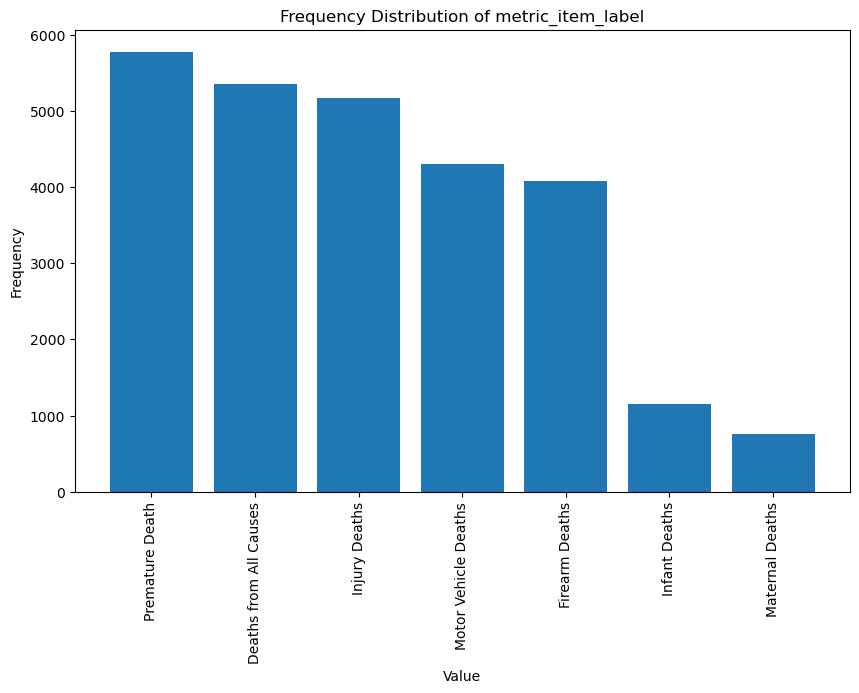

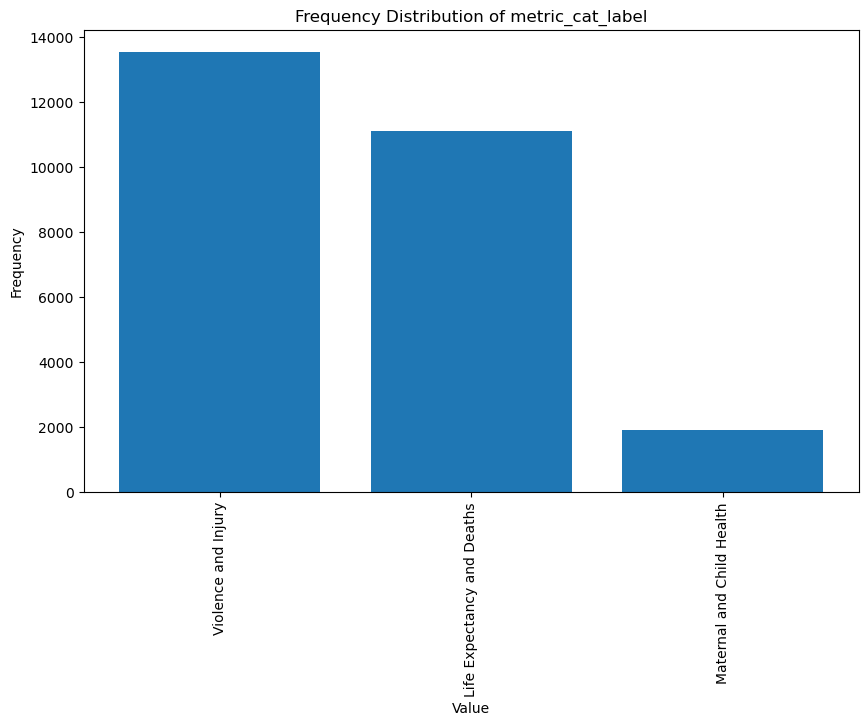

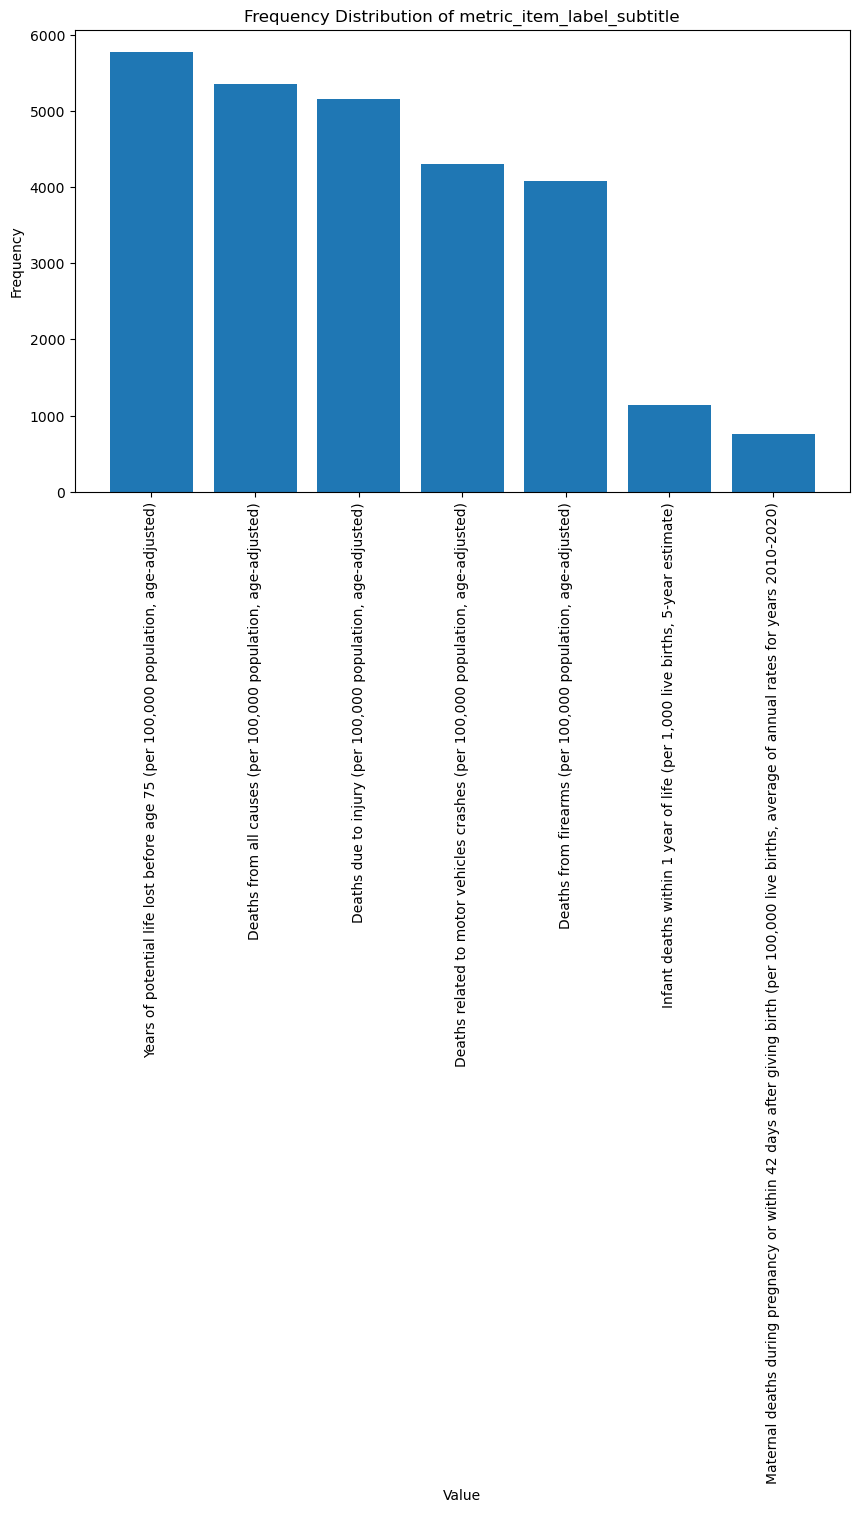

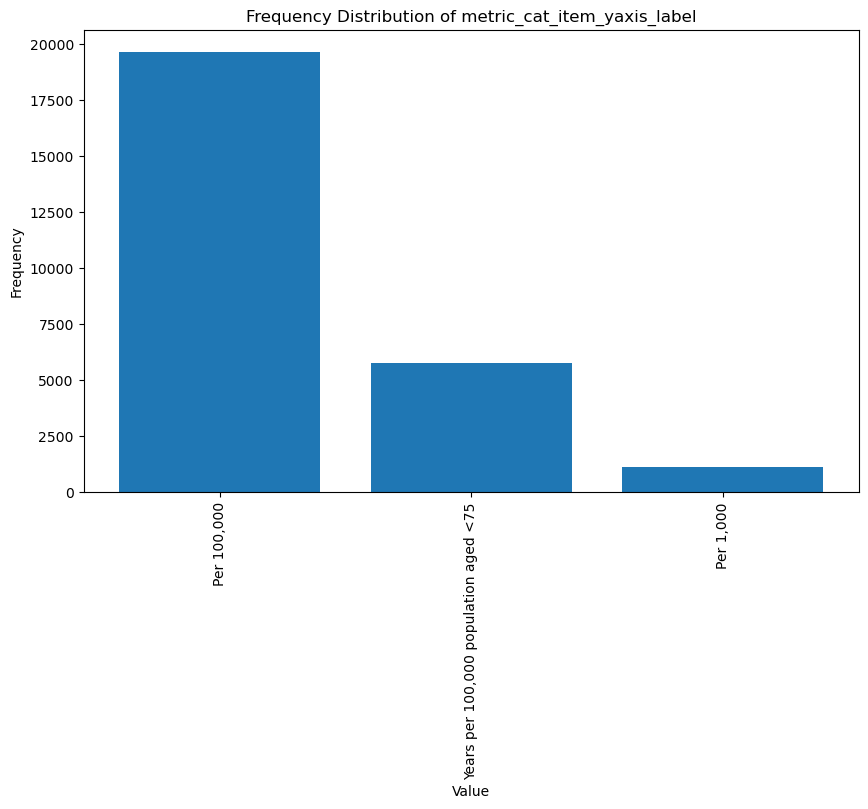

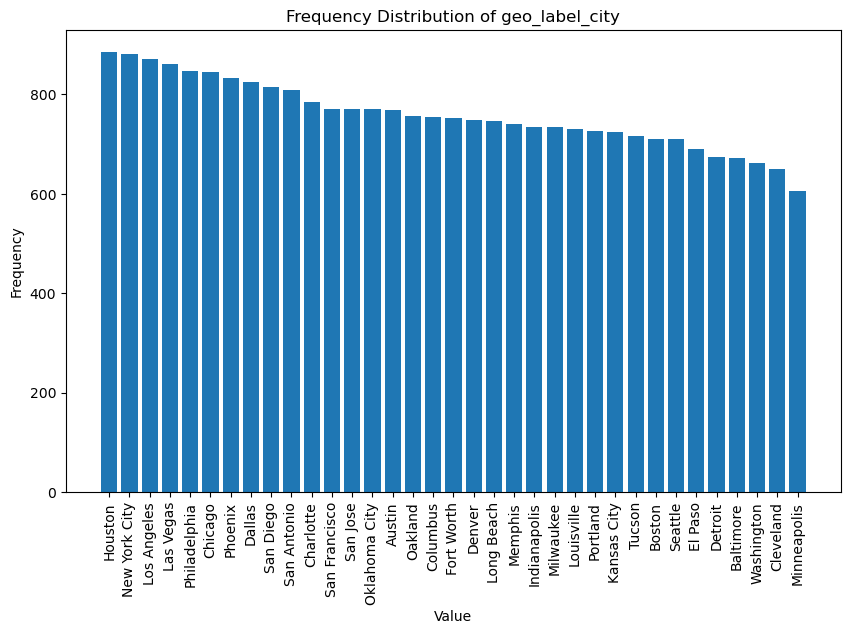

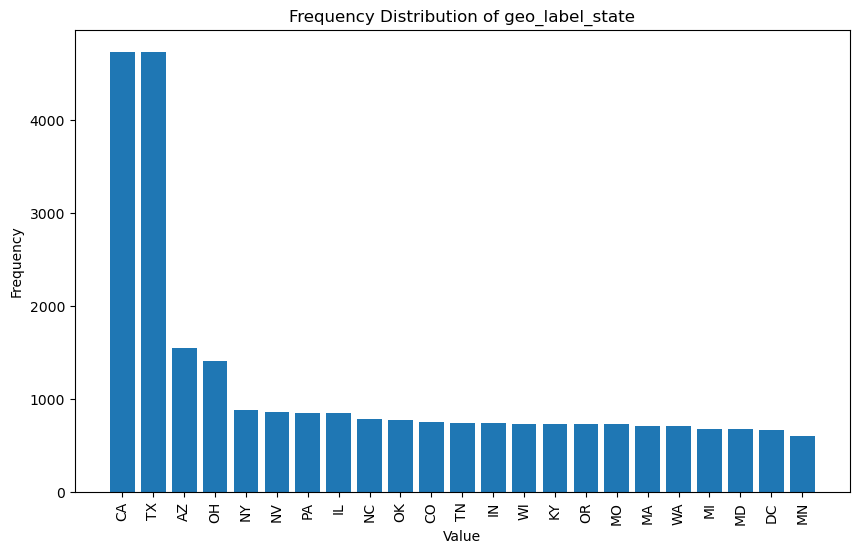

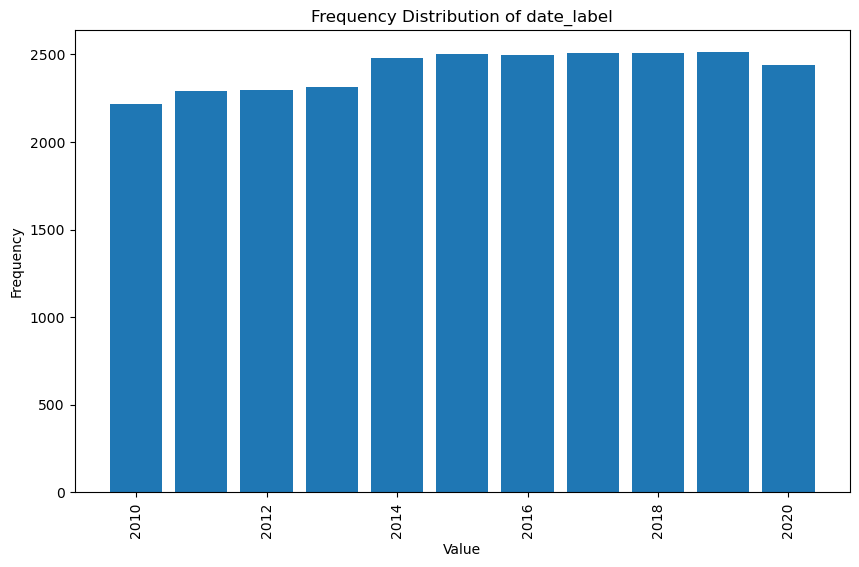

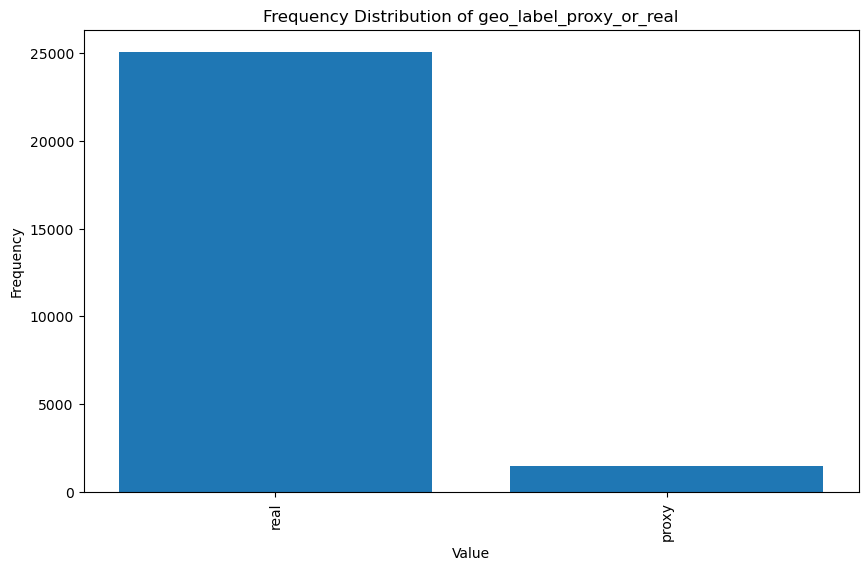

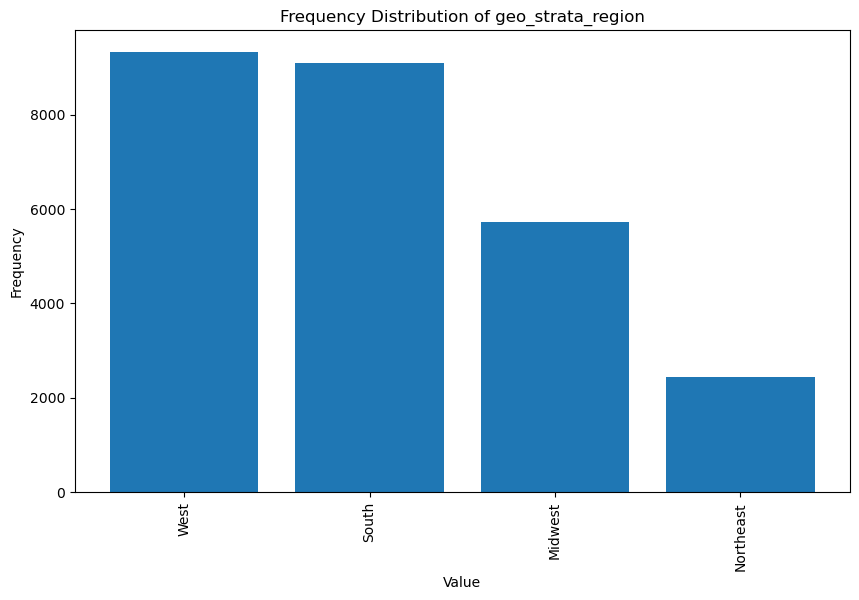

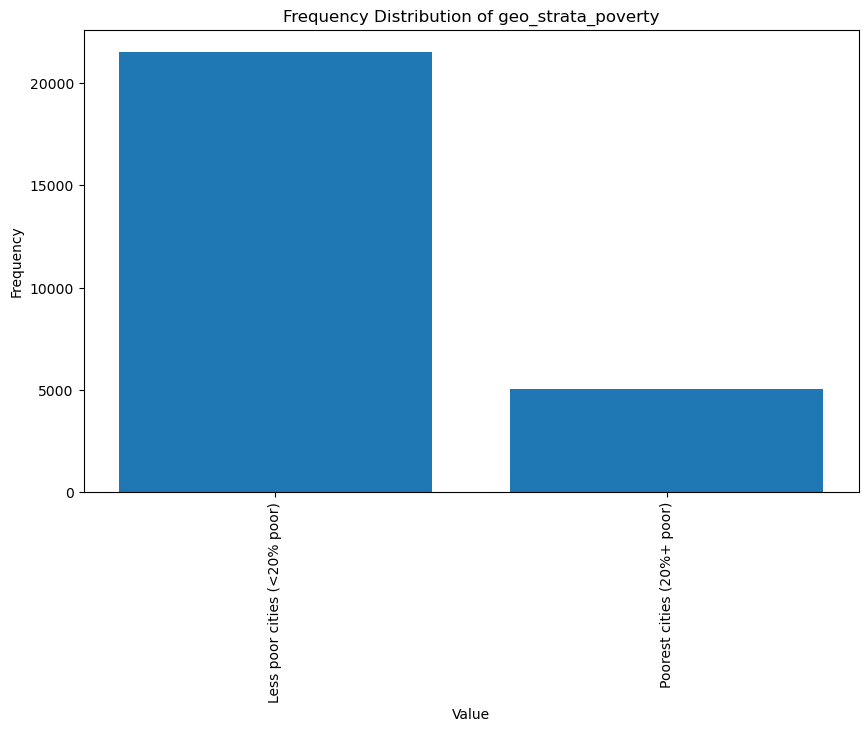

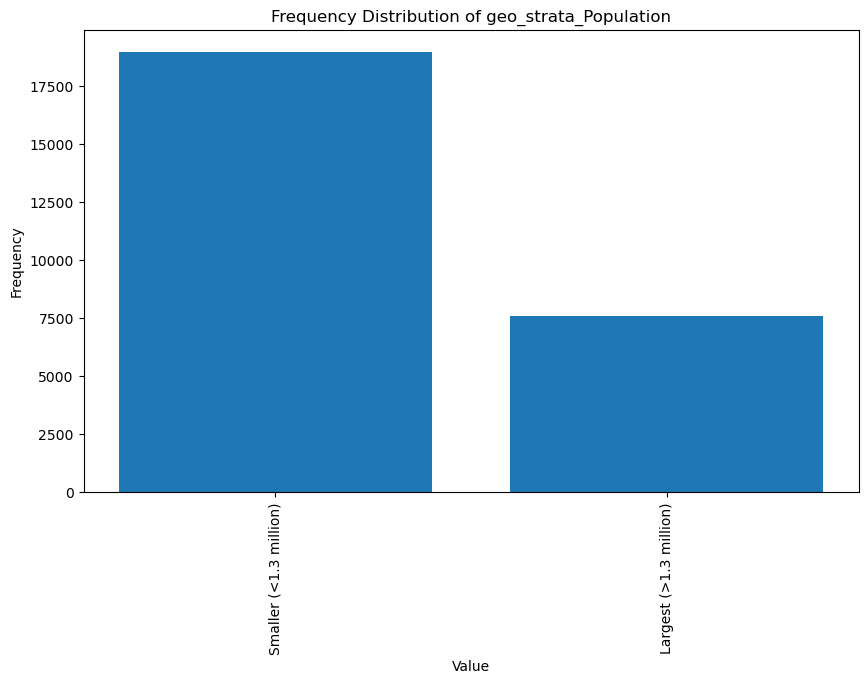

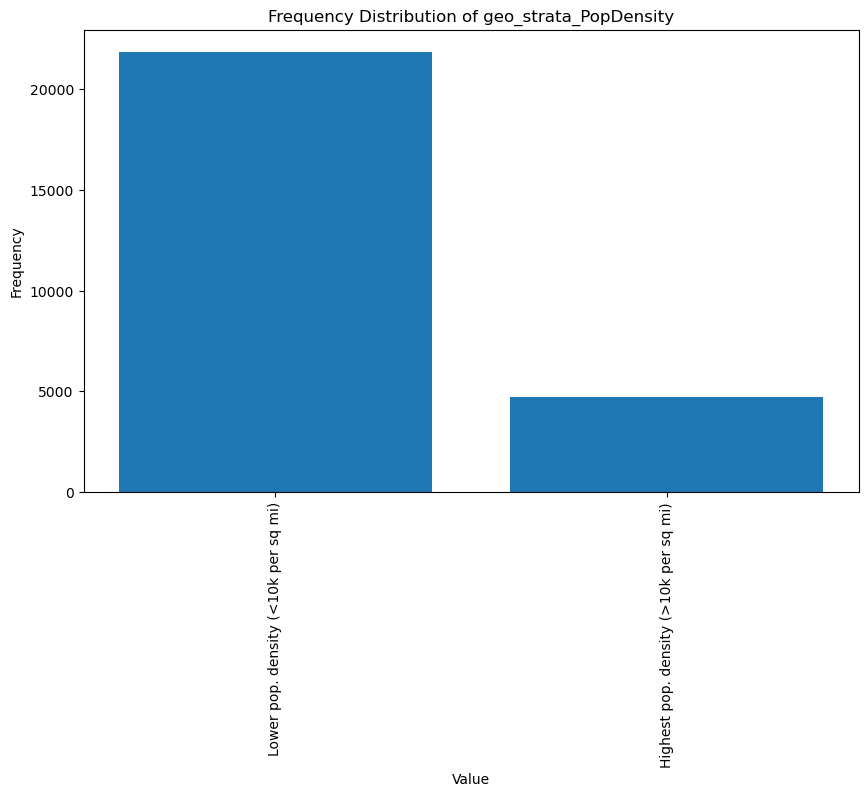

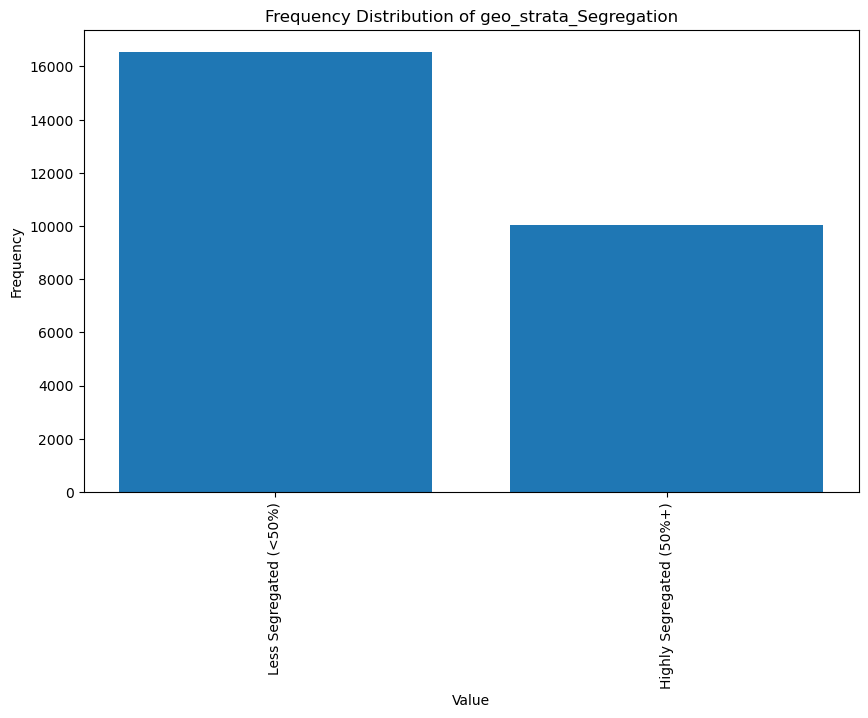

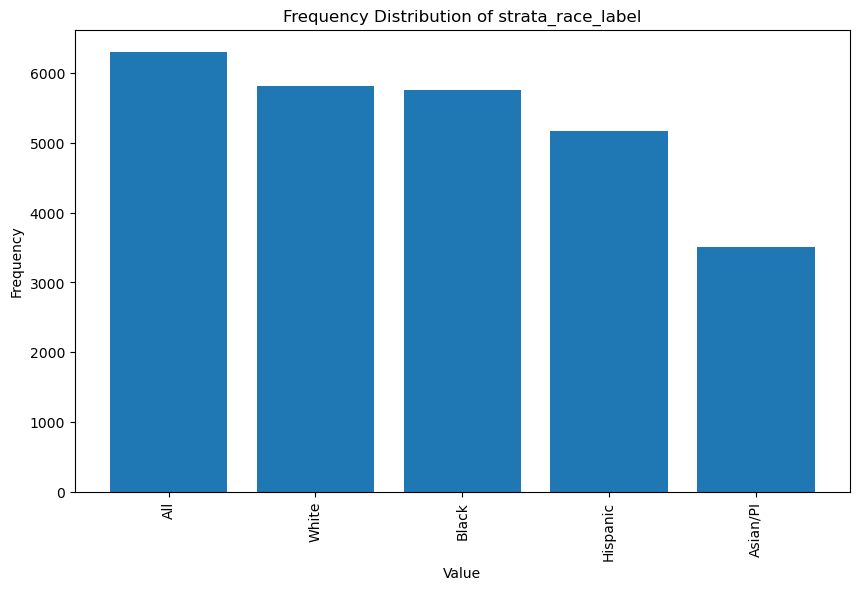

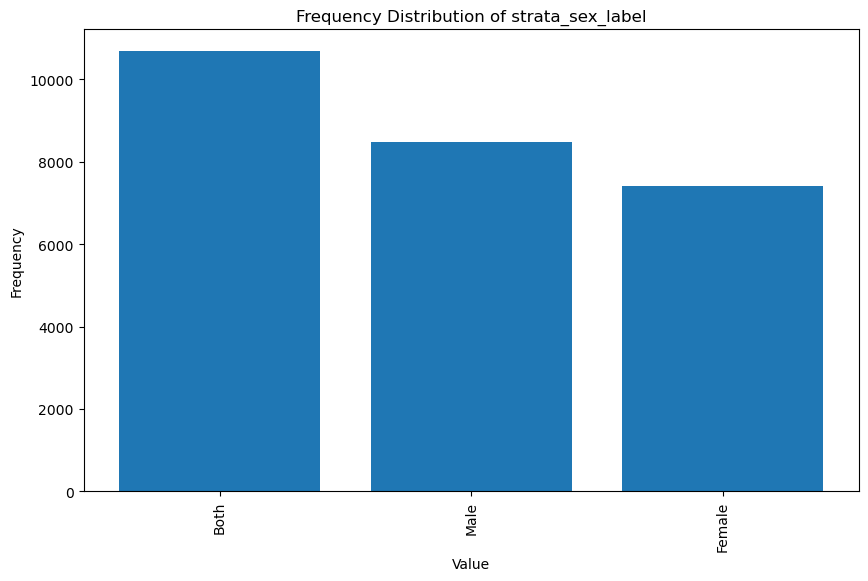

In [145]:
plot_columns = original_data.drop(['geo_fips_code', 'value', 'value_95_ci_low', 'value_95_ci_high'], axis=1)

for i in range(15):
    column = plot_columns.columns[i]
    
    column_counts = plot_columns[column].value_counts()

    plt.figure(figsize=(10, 6))
    plt.bar(column_counts.index, column_counts.values)
    plt.xlabel('Value')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {column}')

See how the data correlates

In [146]:
corr_matrix = data.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

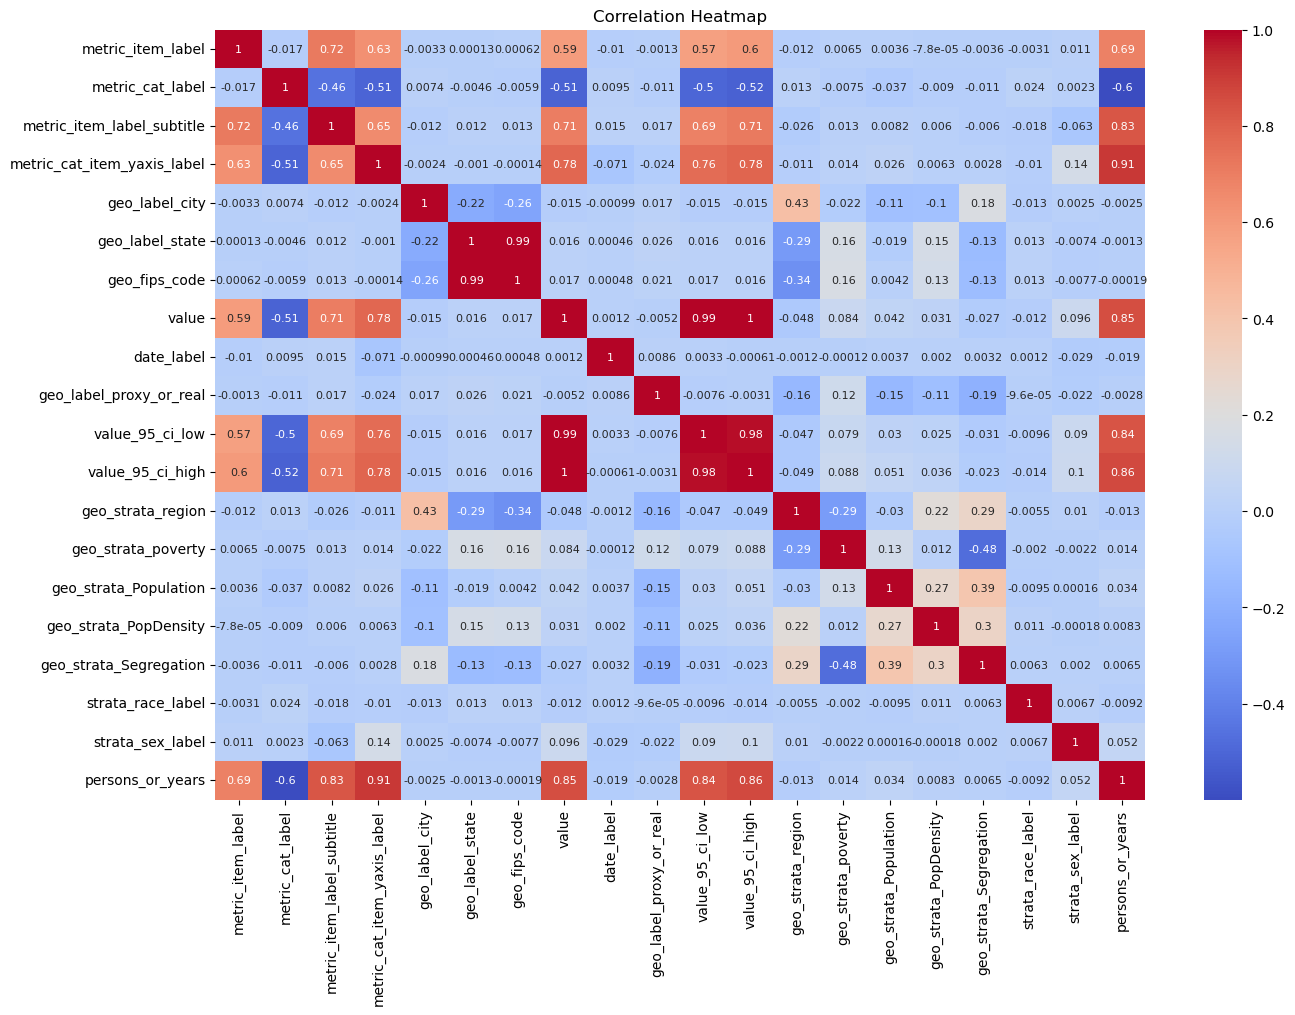

In [147]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap')

In [148]:
data.to_csv('data.csv', index=False)

In [334]:
data = pd.read_csv('data.csv')
data

,metric_item_label,metric_cat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,geo_label_city,geo_label_state,geo_fips_code,value,date_label,geo_label_proxy_or_real,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,persons_or_years
0,0.0,0.0,1.0,1.0,32.0,21.0,5363.0,0.004864,2012.0,1.0,0.004610,0.005132,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,11.0,20.0,4827.0,0.009782,2011.0,1.0,0.009543,0.010025,2.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0
2,0.0,0.0,1.0,1.0,24.0,16.0,4055.0,0.003762,2012.0,1.0,0.003207,0.004393,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,16.0,1.0,643.0,0.006167,2012.0,1.0,0.005797,0.006558,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,6.0,15.0,3918.0,0.010482,2010.0,1.0,0.009922,0.011068,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26569,6.0,0.0,6.0,2.0,22.0,14.0,3651.0,5786.217877,2020.0,1.0,5668.487295,5903.948459,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
26570,6.0,0.0,6.0,2.0,20.0,22.0,5553.0,7087.929743,2020.0,1.0,6458.346917,7717.512570,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0
26571,6.0,0.0,6.0,2.0,12.0,20.0,4835.0,4099.348306,2011.0,1.0,3723.288703,4475.407910,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
26572,6.0,0.0,6.0,2.0,20.0,22.0,5553.0,5706.528569,2014.0,1.0,4594.357077,6818.700061,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
